In [2]:
import pandas as pd
%matplotlib inline

mdl = pd.read_csv('dataset/DSProjectData.csv', skipinitialspace=True, low_memory=False)

In [3]:
mdl['Date']=pd.to_datetime(mdl['Date'])

In [4]:
mdl.head().sort_values('Date')

,Server Name,Week,CPU %,RAM,Date
0,CALBIPRD01,Wk 1,0.2260,6.2,2017-01-07
1,CALBIPRD01,Wk 2,0.1264,6.2,2017-01-14
2,CALBIPRD01,Wk 3,0.4300,5.6,2017-01-21
3,CALBIPRD01,Wk 4,0.0850,5.7,2017-01-28
4,CALBIPRD01,Wk 5,0.1200,6.2,2017-02-04


In [5]:
mdlsql=mdl[mdl['Server Name']=='CALMFRRSQL']

<B>CALPBPRDSQL RAM<B>

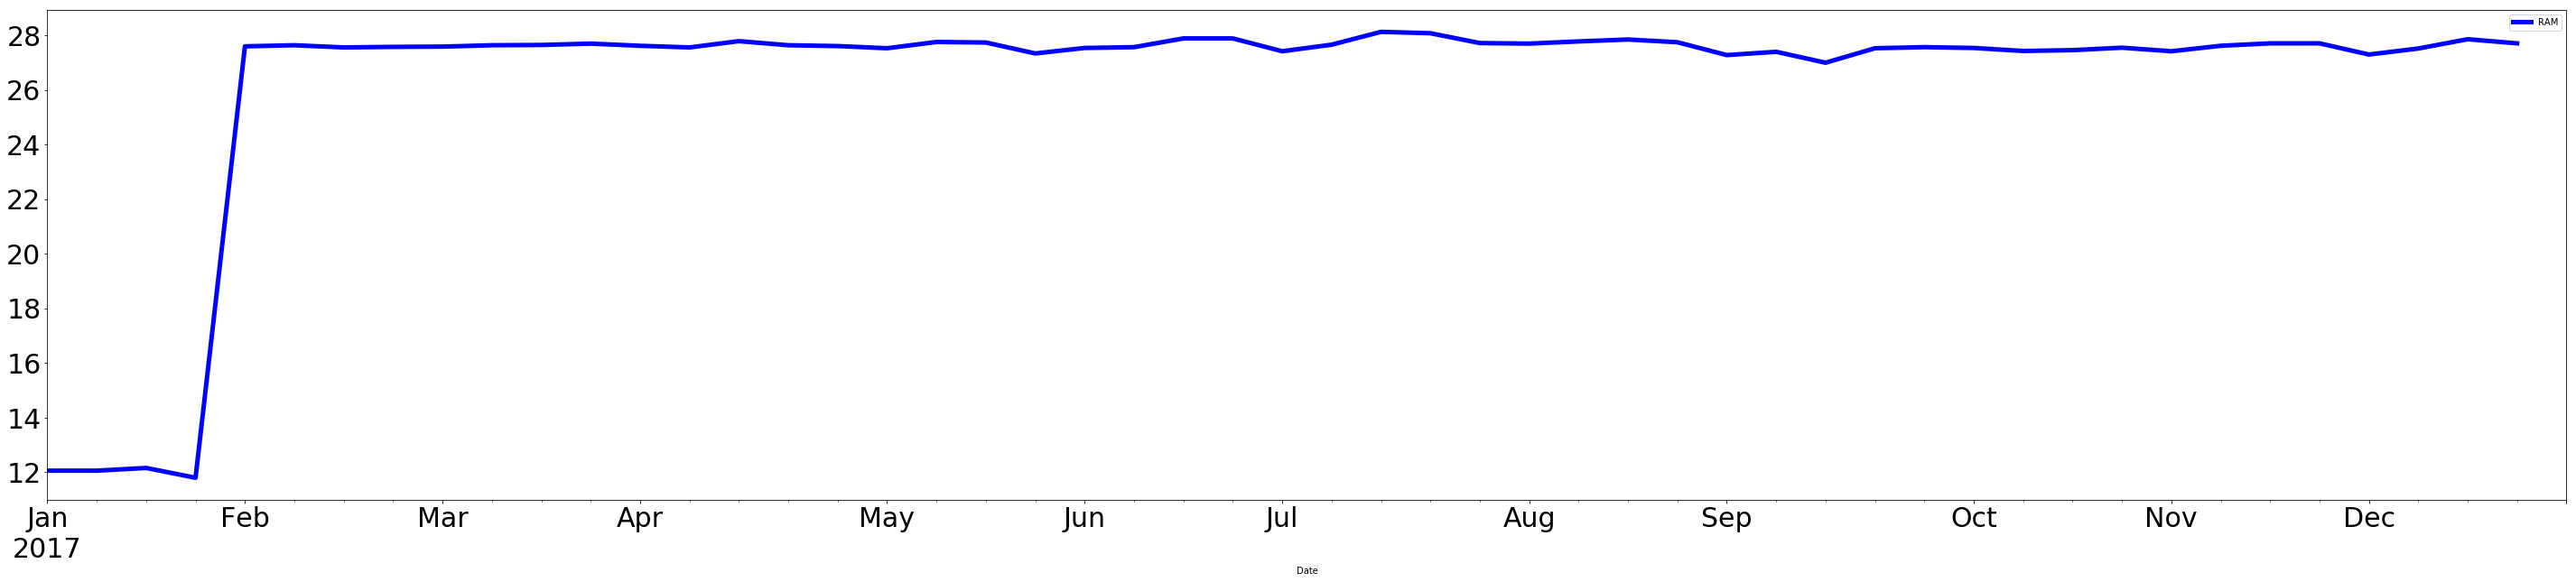

In [6]:
mdlsql.plot(kind='line', figsize=(50,10), fontsize=30 , legend=True, linewidth=5.0, x='Date', y='RAM', color ='blue')

In [7]:
mdlsql.set_index('Date', inplace=True)
mdlsql['Month']= mdlsql.index.month
mdlsql['Day']=mdlsql.index.day

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
mdlsql.head()

,Server Name,Week,CPU %,RAM,Month,Day
Date,,,,,,
2017-01-07,CALMFRRSQL,Wk 1,0.312,12.06,1,7
2017-01-14,CALMFRRSQL,Wk 2,0.286,12.06,1,14
2017-01-21,CALMFRRSQL,Wk 3,1.640,12.16,1,21
2017-01-28,CALMFRRSQL,Wk 4,0.372,11.80,1,28
2017-02-04,CALMFRRSQL,Wk 5,24.000,27.60,2,4


<B>CALBIPRDSQL RAM (Rolling One Month)</B>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


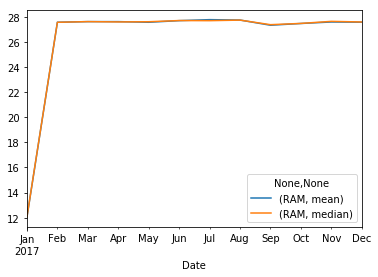

In [9]:
mdlsql[['RAM']].resample('M', how =['mean','median']).rolling(window =1, center =True).mean().plot()
#eda_time01[['RAM']].resample('M', how =['median','mean']).plot()

<b>Autocorrlation for RAM - Week / Month Difference<b>

In [10]:
print 'CALBIPRDSQL RAM Week Corr', mdlsql['RAM'].dropna().resample('D').mean().autocorr(lag=7)
print 'CALBIPRDSQL RAM Month Corr', mdlsql['RAM'].resample('M').mean().autocorr(lag=1)

CALBIPRDSQL RAM Week Corr 0.851584693447
CALBIPRDSQL RAM Month Corr 0.0764183408959


<b>Autocorrlation for RAM - lags 1, 2, 3, 4, 5, 6, 7, 12, 24</b>
<br>Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless,
then the series does not need a higher order of differencing.</br>

In [11]:
print 'diff(!) lag =1 :', mdlsql['RAM'].dropna().diff(1).dropna().autocorr(lag=1)
print 'diff(2) lag =1 :', mdlsql['RAM'].dropna().diff(2).dropna().autocorr(lag=1)
print 'lag =1 :', mdlsql['RAM'].dropna().autocorr(lag=1)
print 'lag =2 :', mdlsql['RAM'].dropna().autocorr(lag=2)
print 'lag =3 :', mdlsql['RAM'].dropna().autocorr(lag=3)
print 'lag =4 :', mdlsql['RAM'].dropna().autocorr(lag=4)
print 'lag =5 :', mdlsql['RAM'].dropna().autocorr(lag=5)
print 'lag =6 :', mdlsql['RAM'].dropna().autocorr(lag=6)
print 'lag =7 :', mdlsql['RAM'].dropna().autocorr(lag=7)
print 'lag =12 :', mdlsql['RAM'].dropna().autocorr(lag=12)
print 'lag =24 :', mdlsql['RAM'].dropna().autocorr(lag=24)
print 'lag =24 :', mdlsql['RAM'].dropna().autocorr(lag=34)

diff(!) lag =1 : -0.0429042879059
diff(2) lag =1 : 0.465933406748
lag =1 : 0.851584693447
lag =2 : 0.687900512744
lag =3 : 0.482309847053
lag =4 : 0.0510787064514
lag =5 : 0.0546498471319
lag =6 : 0.0380725622251
lag =7 : 0.000352389699917
lag =12 : -0.0582961224855
lag =24 : -0.287531989565
lag =24 : 0.577339261305


<b> CALBIPRDSQL RAM Autocorrlation - Month Lag 1 to 11</b>

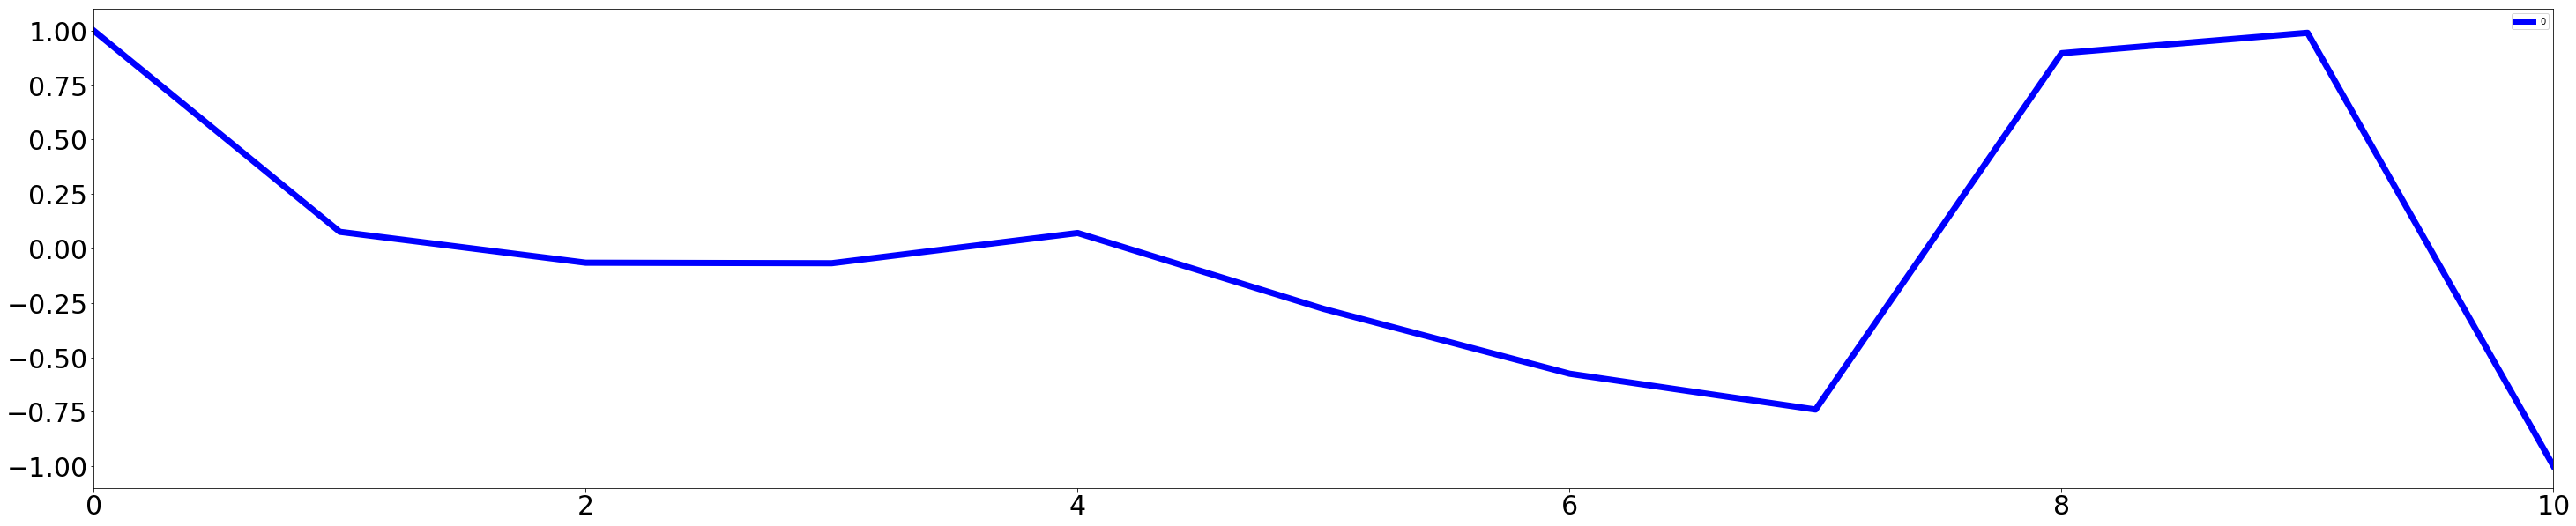

In [13]:
autoc = []

for i in range(11):
    autoc.append(mdlsql['RAM'].resample('M').mean().autocorr(lag=1*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='blue', linewidth=7.0)

<b> CALBIPRDSQL RAM Autocorrlation - Week Lag 1 to 51</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


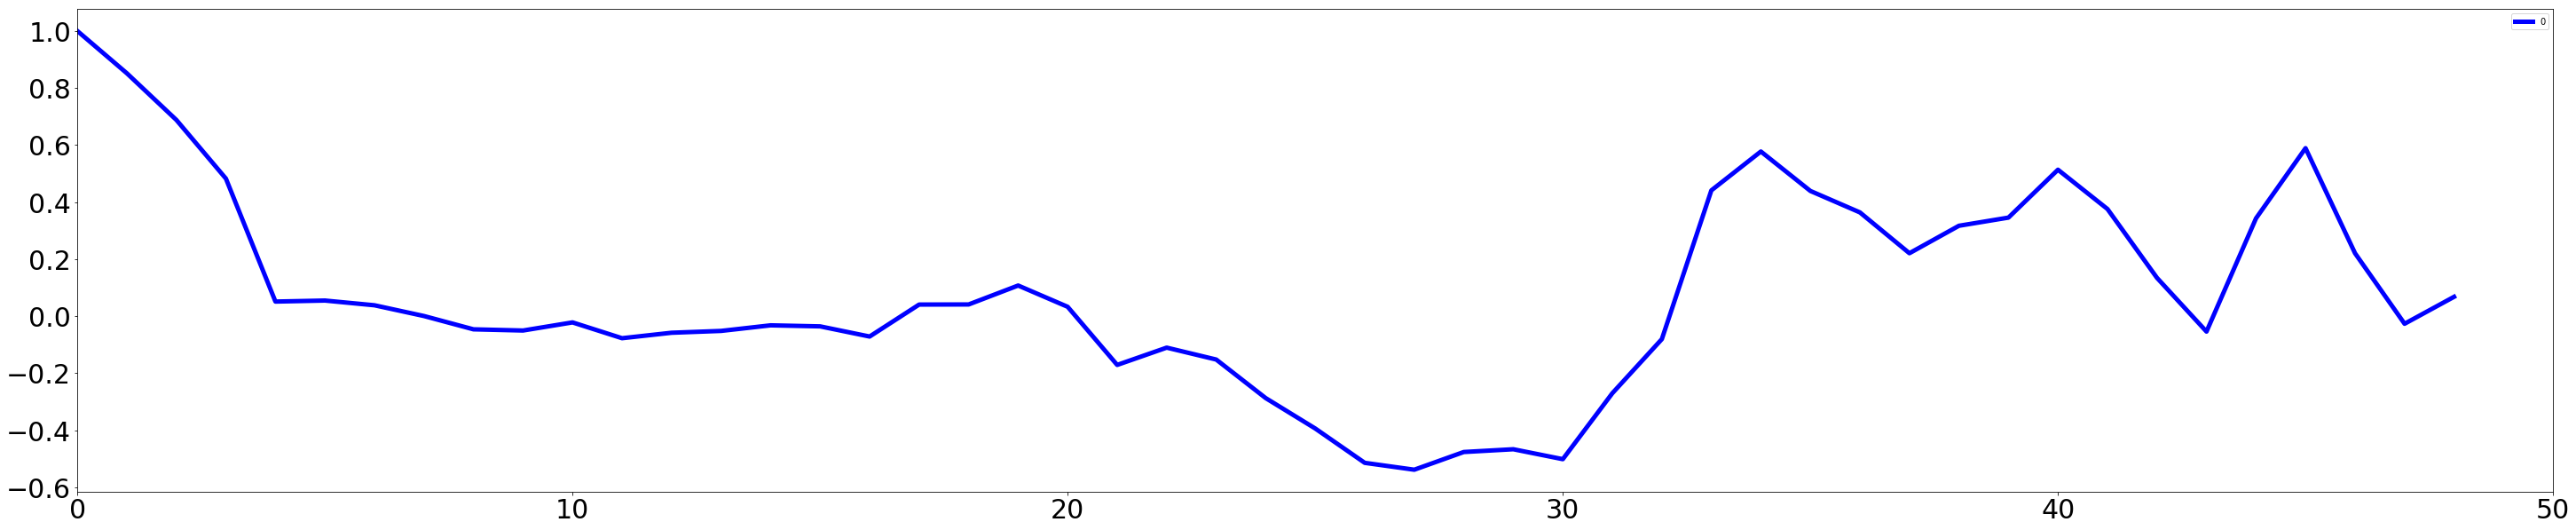

In [14]:
autoc = []

for i in range(51):
    autoc.append(mdlsql['RAM'].resample('D').mean().autocorr(lag=7*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='blue', linewidth=5.0)

<b>This shows a typical pattern of an autocorrelation plot, that it should
decrease to 0 as lag increases.</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


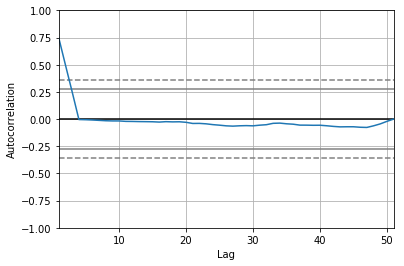

In [15]:
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(mdlsql['RAM'].dropna())

<B>Statsmodels Autocorrelation </B>
<br>lags = 1 for Week, lags = 4 for Month, lags = 12 for Quater, lags = 24 for Half yearly</br>
<br><b>Question:</b> for lags = 48, seasonality goes out of confident intvervel, Why? <br> 

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


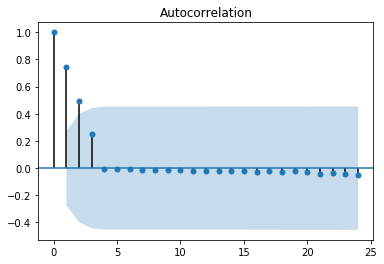

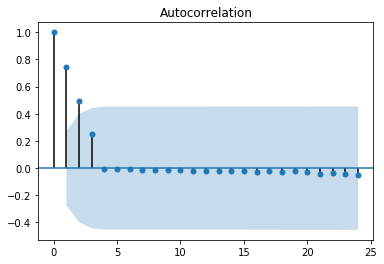

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(mdl01['RAM'].dropna(),lags=24) #lag=70 for seasanlity, lags =25
#plot_acf(mdlsql['RAM'].dropna().diff(1).dropna(),lags=24) 
plot_acf(mdlsql['RAM'].dropna(),lags=24) 

<b> Trend has been observed  as non-stationary, 'diff' of 1 used to make it stationary </b>
<br>Note:</br>
<br> <font color ='red'>Autocorrelation (0.851584693447) for lag 1,</font> so we expect AR(1) should be between 0 and 1. If we observed a handful of random distributed spikes, a moving average modelwould be useful. </br>

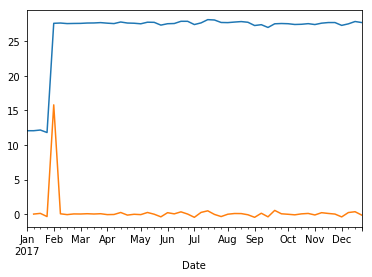

In [17]:
mdlsql['RAM'].dropna().plot()
mdlsql['RAM'].dropna().diff(1).dropna().plot()

In [20]:
from statsmodels.tsa.arima_model import ARMA

mdlsqla = mdlsql[['RAM']].dropna().diff(1).dropna().astype(float)
#mdlsqla = mdlsql[['RAM']].dropna().astype(float)
modela = ARMA(mdlsqla, (1,0)).fit() # if coef is >1 then use diff, check this coef is ~ coef of autocorrlation
modela.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   50
Model:                     ARMA(1, 0)   Log Likelihood                -110.848
Method:                       css-mle   S.D. of innovations              2.221
Date:                Sun, 07 Jan 2018   AIC                            227.695
Time:                        18:37:00   BIC                            233.432
Sample:                    01-14-2017   HQIC                           229.880
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3136      0.302      1.040      0.304      -0.278       0.905
ar.L1.RAM     -0.0421      0.140     -0.301      0.765      -0.316       0.232
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -23.7652           +0.0000j           23.7652            0.5000
-----------------------------------------------------------------------------
"""

<b>Note:</b>
<br>1 . From the ARMA Model Result (AR=1, MA=0), it has been observed that 'RAM' coef is 0.9213 which is high and P <.05, so 'diff' 1 used to make it stationary and P value is < .05 which is significant.</br>
<br> <font color ='red'>1. When diff =0 AR coef is 0.9213 and autocorrelation at lag 1 with diff(0) is 0.851584693447 and P 0.000 < .05 </font> </br>
<br><font color ='red'> 2. When diff =1 AR coef is -0.0421 and autocorrelation at lag 1 with diff(1) is -0.0429042879059 and P 0.765 >.05</font> 
</br> 


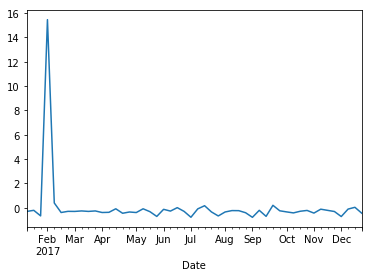

In [21]:
modela.resid.plot()

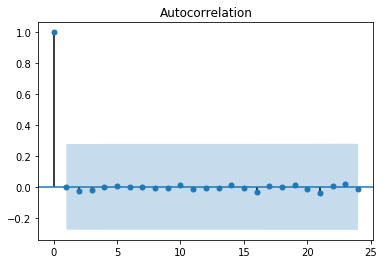

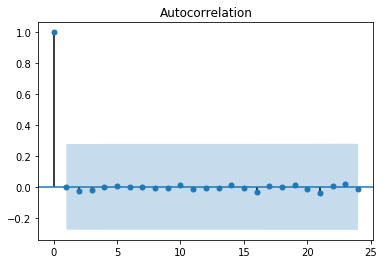

In [22]:
plot_acf(modela.resid, lags=24)

In [23]:
#mdl01 = mdl01[['CPU %']].dropna().astype(float)
#model = ARMA(mdl01, (1, 1)).fit()
#model.summary()

In [24]:
#mdlsqlm = mdlsql[['RAM']].dropna().diff(1).dropna().astype(float)
mdlsqlm = mdlsql[['RAM']].dropna().astype(float)
modelm = ARMA(mdlsqlm, (0, 1)).fit()
modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   51
Model:                     ARMA(0, 1)   Log Likelihood                -127.428
Method:                       css-mle   S.D. of innovations              2.917
Date:                Sun, 07 Jan 2018   AIC                            260.857
Time:                        18:38:43   BIC                            266.652
Sample:                    01-07-2017   HQIC                           263.072
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3372      0.722     36.503      0.000      24.923      27.751
ma.L1.RAM      0.7811      0.091      8.585      0.000       0.603       0.959
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2803           +0.0000j            1.2803            0.5000
-----------------------------------------------------------------------------
"""

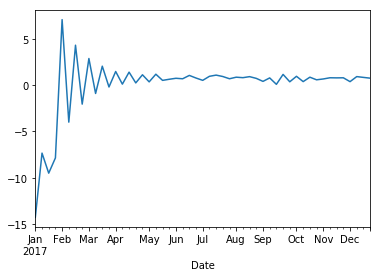

In [28]:
modelm.resid.plot()

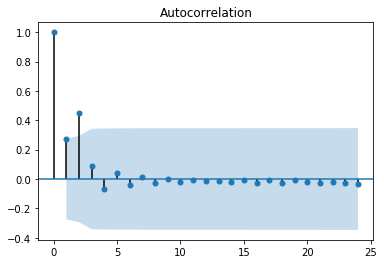

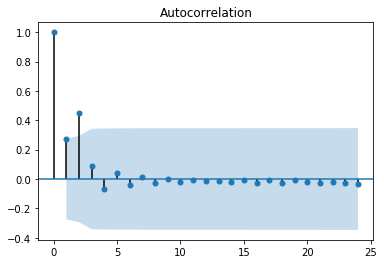

In [29]:
plot_acf(modelm.resid, lags=24)

<b>Ask ARMA(0,1) how to predict</b>

<b>ARIMA</b>

In [31]:
from statsmodels.tsa.arima_model import ARIMA
mdlsql = mdlsql[['RAM']].dropna().astype(float)
model = ARIMA(mdlsql, (1, 1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.RAM   No. Observations:                   50
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -110.848
Method:                       css-mle   S.D. of innovations              2.221
Date:                Sun, 07 Jan 2018   AIC                            227.695
Time:                        18:39:51   BIC                            233.432
Sample:                    01-14-2017   HQIC                           229.880
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3136      0.302      1.040      0.304      -0.278       0.905
ar.L1.D.RAM    -0.0421      0.140     -0.301      0.765      -0.316       0.232
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -23.7652           +0.0000j           23.7652            0.5000
-----------------------------------------------------------------------------
"""

In [32]:
mdlsql['RAM'].dropna().diff(1).dropna().autocorr(1)
#mdl06['RAM'].dropna().autocorr(1)

-0.04290428790588105

<b>Note:</b>
<br><font color ='red'>From ARIMA (1,1,0) coef is -0.0421 and diff(1).autocorr(1) is -0.042904 which is not same <b>what it indicates,</b> P value is 0.765 > .05 which is not significate </font></br>
<br>Check: 1. Does this model match the lag 1 autocorrelation of the differenced series? 2. Is the data stationary?</br>


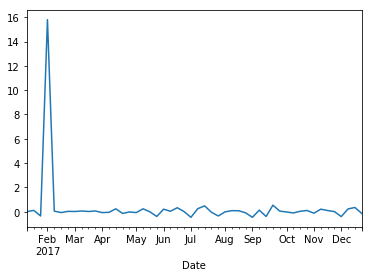

In [33]:
#model.resid.plot()
mdlsql['RAM'].dropna().diff(1).dropna().plot()

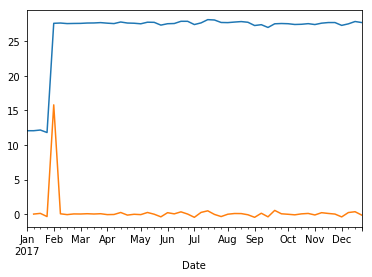

In [34]:
mdlsql['RAM'].dropna().plot()
mdlsql['RAM'].dropna().diff(1).dropna().plot()

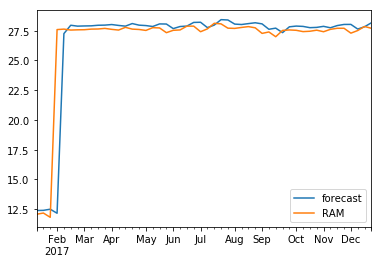

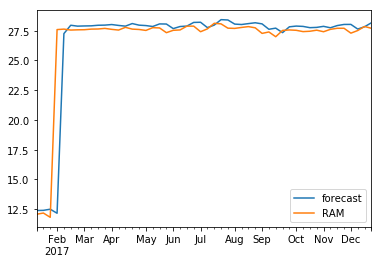

In [35]:
model.plot_predict(1, 50)

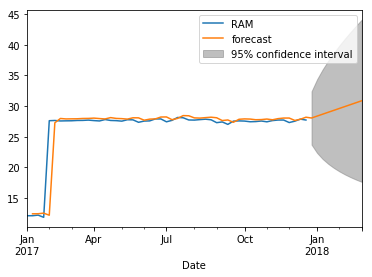

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdlsql['RAM'].dropna().plot(ax=ax)
fig = model.plot_predict(1,60, ax=ax, plot_insample=False)

<b>Predit from AR(1) model</b>

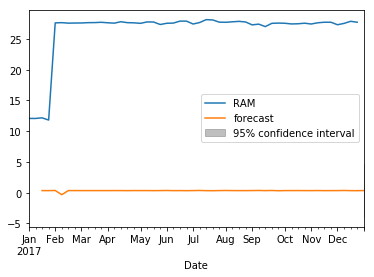

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdlsql['RAM'].dropna().plot(ax=ax)
fig = modela.plot_predict(1,50, ax=ax, plot_insample=False)

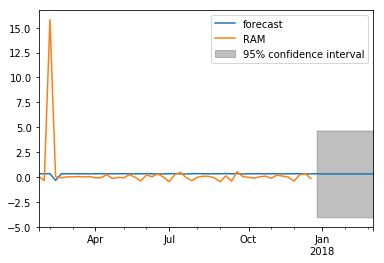

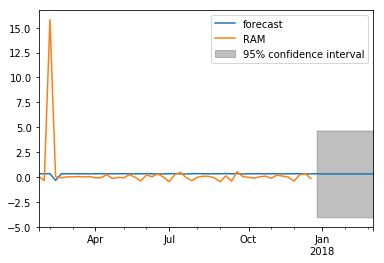

In [38]:
modela.plot_predict(1, 60)